# DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP @GRIP THE Spark Foundation
 


TASK 1:Prediction using Supervised ML

AUTHOR:KRISHNA S

PROBLEM STATEMENT:
                   What will be predicted score if a student studies for 9.25 hrs/ day?

# Importing necessary libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Import dataset

In [4]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url)
print("Data uploaded sucessfully")
data.head(5)

Data uploaded sucessfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Plotting the data

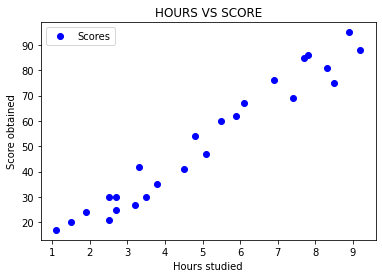

In [11]:
data.plot(x='Hours',y='Scores',style='o',c='blue')
plt.title('HOURS VS SCORE')
plt.xlabel('Hours studied')
plt.ylabel('Score obtained')
plt.show()

In [12]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


From the graph we obtain that there is a positive linear relationship between Hour and Score , and by computing correlation it can be concluded that the variables Hours and Score exhibit a strong positive linear relationship.

# Training and Testing Data

In [17]:
x=data.iloc[:, :-1].values
y=data.iloc[:,1].values

In [52]:
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [15]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print('splitting of data done')

splitting of data done


In [22]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print('Training done')

Training done


# Regression


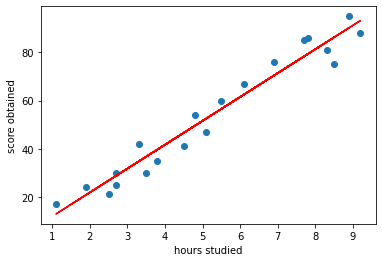

In [26]:
line=regressor.coef_*x+regressor.intercept_
plt.scatter(x_train,y_train)
plt.plot(x,line,color='red')
plt.xlabel('hours studied')
plt.ylabel('score obtained')
plt.show()

# Predicting values

In [28]:
y_pred=regressor.predict(x_test)

In [29]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Comparing Actual vs Predicted values

In [30]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Prediction

In [47]:
hours=9.25
predict_score=regressor.predict([[hours]])
print("the predicted score for student studying for",hours,'is',predict_score[0])

the predicted score for student studying for 9.25 is 93.69173248737535


# Evaluation of the model

In [50]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))
print('prediction score:',r2_score(y_test,y_pred))

Mean absolute error: 4.183859899002975
prediction score: 0.9454906892105355


This indicates 94.5% of the variation in score is explained by the study hours.